## This script draws the SSIM, PSNR, total energy and total steps plots

In [1]:
from skimage import io, img_as_float, img_as_ubyte
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
from scipy import signal
from math import log10
import matplotlib.pyplot as plt
import numpy as np
import json
import math

In [13]:
algo_list = ["exact Serial [1]","Serial Aprox [2]", "SIAFA 1 [3]","SIAFA 2 [4]","SIAFA 3 [5]","SIAFA 4 [6]","exact Semi Serial [7]","Serial Aprox [8]", "exact parallel [9]","exact Semi Parallel [10]","own Aprox [11]"]

parsed_data = {}
rows = 8
coll = len(algo_list)
bit_list = range(0,rows)

kernelname_list = []
kernelname_list.append("blurring")
kernelname_list.append("edge_Detection")

# Load the data from the JSON file into a dictionary
with open('results.json', 'r') as json_file:
    loadedDict = json.load(json_file)

####################################################
# change kernel to show plots for blurr and edge detection     
# kernel = 'edge Detection'
kernel = 'blurring'
####################################################
folder = f'data_{kernel}'
data = loadedDict[kernel]


In [14]:
# change data to mJ 
algo_list = ["exact Serial [1]","Serial Aprox [2]", "SIAFA 1 [3]","SIAFA 2 [4]","SIAFA 3 [5]","SIAFA 4 [6]","exact Semi Serial [7]","Serial Aprox [8]", "exact parallel [9]","exact Semi Parallel [10]","own Aprox [11]"]

#blurring
# loop throw all Bitpositions 
data = loadedDict[kernel]
for indexalgo, algo in enumerate(algo_list):
    for i in range(0,8):
        try:
            data[algo]["energy_con"][i]=data[algo]["energy_con"][i]/10**9
        except:
            continue

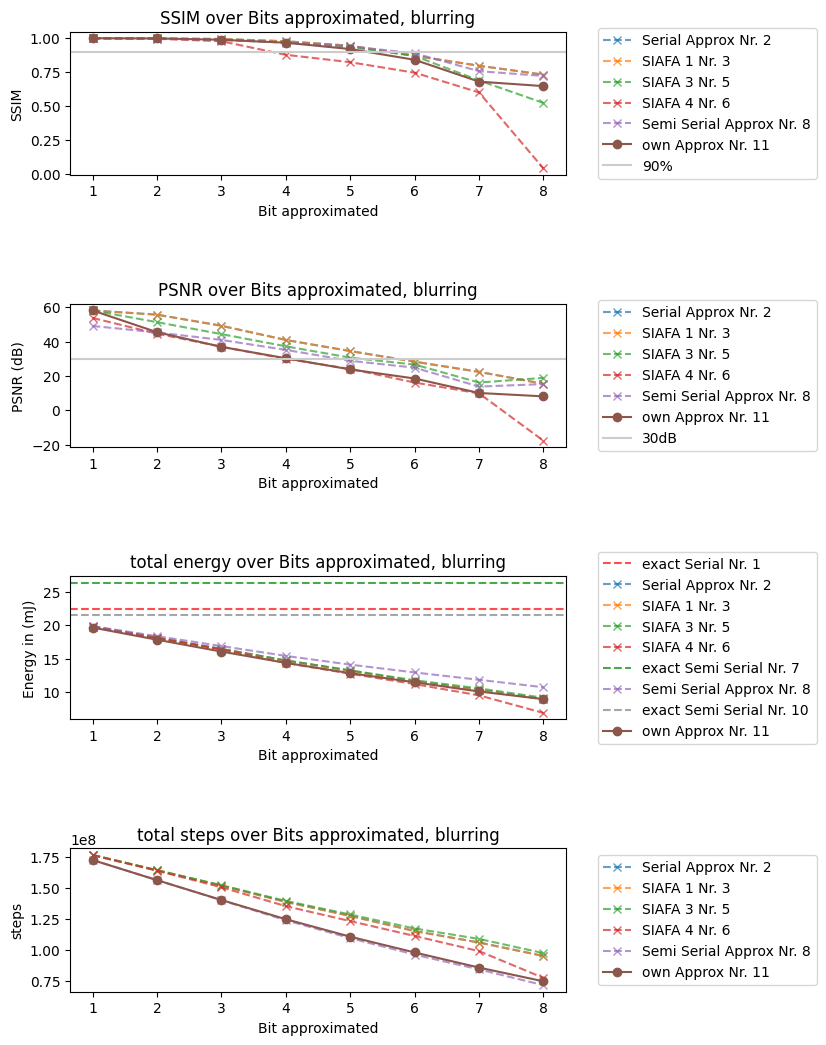

In [15]:
#list of algorthims which should be shown
algo_list = ["exact Serial [1]","Serial Aprox [2]", "SIAFA 1 [3]","SIAFA 2 [4]","SIAFA 3 [5]","SIAFA 4 [6]","exact Semi Serial [7]","Serial Aprox [8]", "exact parallel [9]","exact Semi Parallel [10]","own Aprox [11]"]

#error metrics list 
metrics_list = ["ssi", "psnr", "energy_con", "steps"]

rows = len(metrics_list)
coll = 1
xlist =[1,2,3,4,5,6,7,8]

fig, axs = plt.subplots(rows, coll )
plt.subplots_adjust(left=0.125, bottom=5, right=0.9, top=7, wspace=1, hspace=0.9)

#blurring
# loop throw all Bitpositions 
data = loadedDict[kernel]
for indexMetric, metric in enumerate(metrics_list):
    for indexalgo, algo in enumerate(algo_list):
        
        if 'own' in algo:
            axs[indexMetric].plot(xlist, data[algo][metric], "o-", label='own Approx Nr. 11')
        else:
            if metric == 'energy_con' or 'exact' not in algo:
                if 'SIAFA 1' in algo:
                    axs[indexMetric].plot(xlist, data[algo][metric], "x--", label='SIAFA 1 Nr. 3', alpha=0.7)
                elif 'SIAFA 2' in metric:
                    axs[indexMetric].plot(xlist, data[algo][metric], "x--", label='SIAFA 2 Nr. 4', alpha=0.7)
                elif 'SIAFA 3' in algo:
                    axs[indexMetric].plot(xlist, data[algo][metric], "x--", label='SIAFA 3 Nr. 5', alpha=0.7)
                elif 'SIAFA 4' in algo:
                    axs[indexMetric].plot(xlist, data[algo][metric], "x--", label='SIAFA 4 Nr. 6', alpha=0.7)
                elif '[2]' in algo:
                    axs[indexMetric].plot(xlist, data[algo][metric], "x--", label='Serial Approx Nr. 2', alpha=0.7)
                elif '[8]' in algo:
                    axs[indexMetric].plot(xlist, data[algo][metric], "x--", label='Semi Serial Approx Nr. 8', alpha=0.7)
                elif '[1]' in algo:
                    axs[indexMetric].axhline(data[algo][metric],color='red', linestyle='--', label='exact Serial Nr. 1', alpha=0.7)
                elif '[7]' in algo:
                    axs[indexMetric].axhline(data[algo][metric],color='green', linestyle='--', label='exact Semi Serial Nr. 7', alpha=0.7)
                elif '[10]' in algo:
                    axs[indexMetric].axhline(data[algo][metric],color='gray', linestyle='--', label='exact Semi Serial Nr. 10', alpha=0.7)

    if "ssi" in metric:
        axs[indexMetric].axhline(y=0.9, color='0.8', linestyle='-', label='90%')
        axs[indexMetric].set_title(f"SSIM over Bits approximated, {kernel}")
        axs[indexMetric].set_xlabel("Bit approximated")
        axs[indexMetric].set_ylabel(f'SSIM')
    if "psnr" in metric:
        axs[indexMetric].axhline(y=30, color='0.8', linestyle='-', label='30dB')
        axs[indexMetric].set_title(f"PSNR over Bits approximated, {kernel}")
        axs[indexMetric].set_xlabel("Bit approximated")
        axs[indexMetric].set_ylabel(f'PSNR (dB)')

    if "energy_con" in metric:
        axs[indexMetric].set_title(f"total energy over Bits approximated, {kernel}")
        axs[indexMetric].set_xlabel("Bit approximated")
        axs[indexMetric].set_ylabel(f'Energy in (mJ)')
    
    if "steps" in metric:
        axs[indexMetric].set_title(f"total steps over Bits approximated, {kernel}")
        axs[indexMetric].set_xlabel("Bit approximated")
        axs[indexMetric].set_ylabel(f'steps')

    
    axs[indexMetric].legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()